In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow.keras.optimizers as optim
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Exercise 1
## Tasks
1. Download and prepare CIFAR-10 dataset 
1. Write a simple CNN network for classifying images
    - use LeakyReLU as the activation function
    - use SGD as the optimizer and 0.0001 as the learning rate, and keep all default parameters
    - Report the accuracy on the test set
1. Change the optimiser to Adam and run again the experiment. Report accuracy on test set.
1. Swap the LeakyReLUs for Tanh. Then run again the experiment and report accuracy on test set. Make a separate file for this experiment.
1. Visualize the results of these runs on a Tensorboard. Just put any screenshot of the web interface with the experiments to prove you got it working is enough. (for example show the training loss on tensorboard)

## Task 1, download CIFAR-10 dataset

In [2]:
cifar_10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_10.load_data()

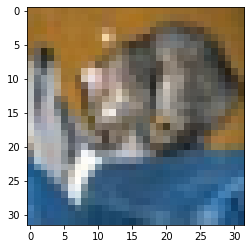

In [3]:
plt.figure()
plt.imshow(test_images[0])
plt.grid(False)
plt.show()

In [4]:
train_images[0].shape
train_labels[0].shape

(1,)

## Task 4

In [7]:
alpha=0.3
epochs=60
activation_func = tf.keras.activations.tanh

model1 = Sequential([
  layers.Conv2D(32, (3, 3), padding='same', activation=activation_func, input_shape=(32, 32, 3)),
  layers.Conv2D(64, (3, 3), padding='same', activation=activation_func),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=activation_func),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation=activation_func),
  layers.Dense(10, activation="softmax")
])

model1.compile(optimizer=optim.SGD(learning_rate=0.0001), 
            loss=SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [8]:
history1 = model1.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_data=(test_images, test_labels)
)

Epoch 1/60
1563/1563 [==============================] - 15s 10ms/step - loss: 2.1761 - accuracy: 0.2097 - val_loss: 2.0541 - val_accuracy: 0.2586
Epoch 2/60
1563/1563 [==============================] - 15s 10ms/step - loss: 1.9783 - accuracy: 0.2858 - val_loss: 1.9227 - val_accuracy: 0.3085
Epoch 3/60
1563/1563 [==============================] - 15s 10ms/step - loss: 1.8749 - accuracy: 0.3305 - val_loss: 1.8333 - val_accuracy: 0.3466
Epoch 4/60
1563/1563 [==============================] - 15s 10ms/step - loss: 1.8020 - accuracy: 0.3625 - val_loss: 1.7795 - val_accuracy: 0.3715
Epoch 5/60
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7468 - accuracy: 0.3832 - val_loss: 1.7227 - val_accuracy: 0.3822
Epoch 6/60
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7010 - accuracy: 0.3987 - val_loss: 1.6827 - val_accuracy: 0.4008
Epoch 7/60
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6644 - accuracy: 0.4103 - val_loss: 1.6467 -

Epoch 57/60
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1548 - accuracy: 0.5982 - val_loss: 1.1748 - val_accuracy: 0.5840
Epoch 58/60
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1507 - accuracy: 0.6000 - val_loss: 1.1742 - val_accuracy: 0.5842
Epoch 59/60
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1466 - accuracy: 0.6007 - val_loss: 1.1827 - val_accuracy: 0.5850
Epoch 60/60
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1428 - accuracy: 0.6020 - val_loss: 1.1683 - val_accuracy: 0.5853


Evaluate the model

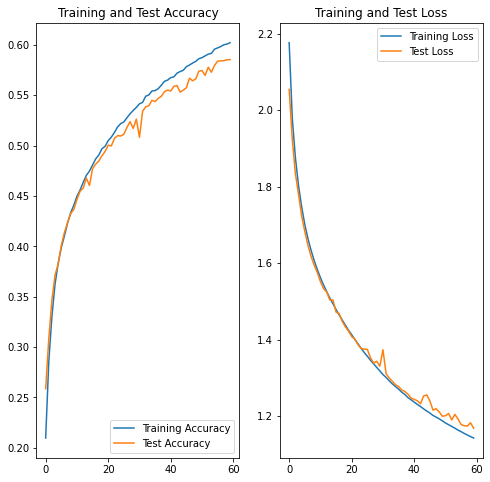

In [14]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()

Change optimizer to `ADAM`

In [10]:
model2 = Sequential([
  layers.Conv2D(32, (3, 3), padding='same', activation=activation_func, input_shape=(32, 32, 3)),
  layers.Conv2D(64, (3, 3), padding='same', activation=activation_func),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=activation_func),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation=activation_func),
  layers.Dense(10, activation="softmax")
])

model2.compile(optimizer=optim.Adam(learning_rate=0.0001),
            loss=SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

model2.summary()

history2 = model2.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_data=(test_images, test_labels)
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

1563/1563 [==============================] - 15s 10ms/step - loss: 0.0057 - accuracy: 0.9999 - val_loss: 1.6083 - val_accuracy: 0.6831
Epoch 48/60
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.6376 - val_accuracy: 0.6819
Epoch 49/60
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0328 - accuracy: 0.9913 - val_loss: 1.6553 - val_accuracy: 0.6807
Epoch 50/60
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.6533 - val_accuracy: 0.6792
Epoch 51/60
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.6632 - val_accuracy: 0.6800
Epoch 52/60
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0382 - accuracy: 0.9892 - val_loss: 1.6716 - val_accuracy: 0.6753
Epoch 53/60
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.6758 - val_

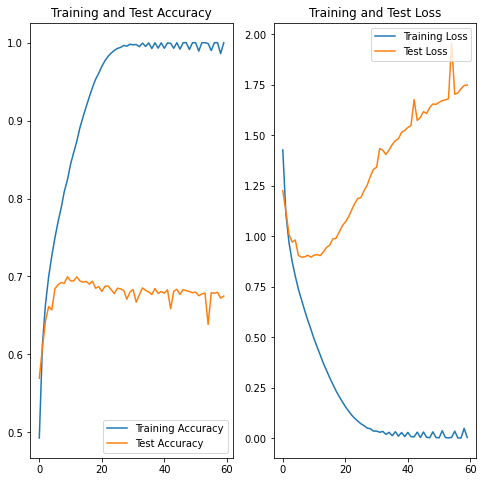

In [13]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()